>>> **1. Zipf ’s Law**


Empirically verify Zipf’s law. 

Use the following freely available corpora: <br>
• King James Bible (on Classroom)<br>
• The Jungle Book (on Classroom) <br>
• SETIMES Turkish-Bulgarian parallel newspaper text 
http://opus.lingfil.uu.se/download.php?f=SETIMES2/bg-tr.txt.zip <br>

1) For each corpus, compute a list of unique words sorted by descending frequency. Feel free to tokenize however you like, e.g. by splitting at whitespace.

2) Use the Python library matplotlib to plot the frequency curves for the corpora, i.e. x-axis is position in the frequency list, y-axis is frequency. Make
sure to provide both a plot with linear axes and one with log-log axes (see
methods matplotlib.pyplot.plot and matplotlib.pyplot.loglog) for
each corpus.

3) Provide a brief discussion of the findings, as well as the source code.

In [1]:
! ls

junglebook.txt		      sample_data	SETIMES.bg-tr.tr
kingjamesbible_tokenized.txt  SETIMES.bg-tr.bg


In [2]:
%matplotlib inline

from typing import List
from collections import Counter
from functools import wraps
from timeit import default_timer as timer
from contextlib import contextmanager
import string


import nltk
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%%capture
# initial preparation

# downloading data for nltk tokenization
nltk.download('punkt')

# creating set of punctuations to exclude them from list of tokens
punctuation = set(string.punctuation)
punctuation.update(["''", '``'])

In [4]:
@contextmanager
def time_my_func():
    
    yield
    
    print(f"Time elapsed: {end-start}")

In [5]:
def timing(f):
    """Simple decorator to measure execution time for the function"""
    @wraps(f)
    def wrap(*args, **kw):
        start = timer()
        result = f(*args, **kw)
        end = timer()
        #print(f"Time elapsed to execute {f.__name__} functions with the following arguments {args}: {end-start}")
        print(f"Time elapsed: {end-start}")
        return result
    return wrap

In [6]:
@timing
def read_data_and_return_tokens(filename: str, encoding: str = 'utf-8-sig', tokenize: bool = True,
                                exclude_punctuation: bool = True) -> List[str]:
    """
    Reads data from the provided filepath and returns list of tokens.

    By default following parameters are applied:
      - 'utf-8-sig' encoding
      - tokenization (separation) of punctuation from actual words
      - exclusion of punctuation tokens from word list
    """
    print(f"Processing the following file: {filename}...")
    tokens = []
    #with time_my_func():
    with open(filename, 'r', encoding=encoding) as f:
      for line in f:
        tokenized_line = nltk.word_tokenize(line.strip()) if tokenize else line.strip().split()
        if exclude_punctuation:
            tokenized_line = [token for token in tokenized_line if token not in punctuation]
        tokens.extend(tokenized_line)

    return tokens

In [7]:
def discover_data_and_return_ordered_frequencies(tokens: List[str]) -> List[int]:
    """Gives some insights about provided tokens and returns list of reversed tokens' frequencies."""
    print("First ten tokens: ", tokens[:10])
    tokens_counter = Counter(tokens)
    print("Top-10 tokens by frequency: ", tokens_counter.most_common(10))

    ordered_frequencies = sorted(tokens_counter.values(), reverse=True)

    return ordered_frequencies

In [8]:
def plot_frequencies(frequency_data: List[int], loglog: bool = False):
    if loglog:
        plt.loglog(range(1, len(frequency_data)+1), frequency_data)
        plt.title('Log frequency plot')
    else:
        plt.plot(range(1, len(frequency_data)+1), frequency_data)
        plt.title('Basic frequency plot')

In [9]:
# using a new cell to distguish data loading from data exploring
data_jungle = read_data_and_return_tokens('junglebook.txt')

Processing the following file: junglebook.txt...
Time elapsed: 0.949989015999563


First ten tokens:  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'The', 'jungle', 'book', 'by', 'Rudyard']
Top-10 tokens by frequency:  [('the', 3397), ('and', 2259), ('of', 1298), ('to', 1232), ('a', 1122), ('he', 875), ('in', 720), ('I', 648), ('his', 638), ('that', 611)]


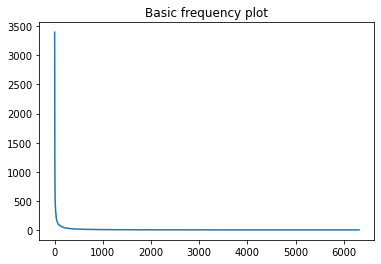

In [10]:
frequency_data = discover_data_and_return_ordered_frequencies(data_jungle)
plot_frequencies(frequency_data)

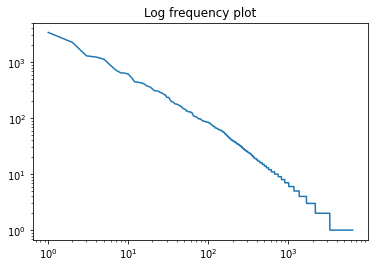

In [11]:
plot_frequencies(frequency_data, loglog=True)

In [12]:
data_bible = read_data_and_return_tokens('kingjamesbible_tokenized.txt')

Processing the following file: kingjamesbible_tokenized.txt...
Time elapsed: 6.2279890310001065


First ten tokens:  ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth']
Top-10 tokens by frequency:  [('the', 62064), ('and', 38846), ('of', 34427), ('to', 13378), ('And', 12847), ('that', 12576), ('in', 12331), ('shall', 9760), ('he', 9666), ('unto', 8940)]


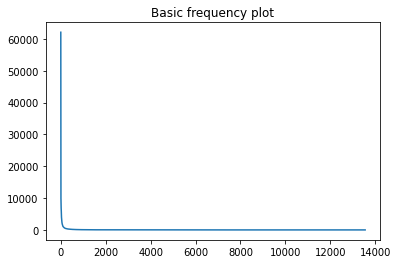

In [13]:
frequency_data = discover_data_and_return_ordered_frequencies(data_bible)
plot_frequencies(frequency_data)

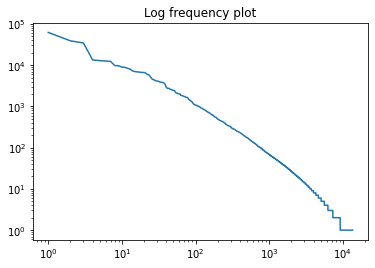

In [14]:
plot_frequencies(frequency_data, loglog=True)

In [15]:
data_tr = read_data_and_return_tokens('SETIMES.bg-tr.tr')

Processing the following file: SETIMES.bg-tr.tr...
Time elapsed: 45.8270983400007


First ten tokens:  ['Hırvat', 'yerel', 'seçimleri', 'ikinci', 'tura', 'kaldı', 'Sonuçlar', 'başta', 'büyük', 'şehirler']
Top-10 tokens by frequency:  [('ve', 99241), ('bir', 76150), ('için', 27414), ('bu', 21551), ('da', 20733), ('de', 20605), ('ile', 15097), ('günü', 14579), ('olarak', 14088), ('olan', 12688)]


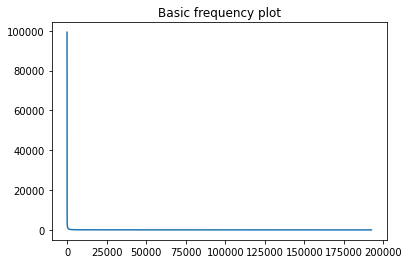

In [16]:
frequency_data = discover_data_and_return_ordered_frequencies(data_tr)
plot_frequencies(frequency_data)

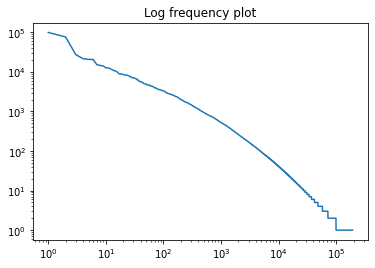

In [17]:
plot_frequencies(frequency_data, loglog=True)

In [18]:
data_bg = read_data_and_return_tokens('SETIMES.bg-tr.bg')

Processing the following file: SETIMES.bg-tr.bg...
Time elapsed: 45.5429105610001


First ten tokens:  ['Местните', 'избори', 'в', 'Хърватия', 'вървят', 'към', 'втори', 'тур', 'Резултатите', 'показаха']
Top-10 tokens by frequency:  [('на', 271026), ('в', 130818), ('и', 123536), ('за', 108269), ('да', 91104), ('от', 86940), ('се', 60088), ('е', 52169), ('че', 47390), ('с', 39177)]


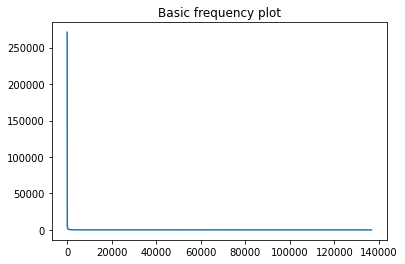

In [19]:
frequency_data = discover_data_and_return_ordered_frequencies(data_bg)
plot_frequencies(frequency_data)

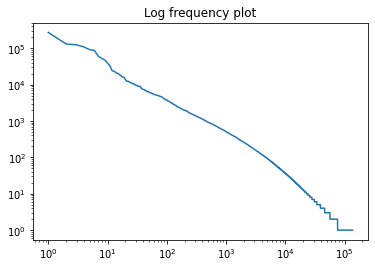

In [20]:
plot_frequencies(frequency_data, loglog=True)

**Conclusion**


Let's take a simple definition of Zipf's law from wikipedia.


Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.

Then, we expect to see 1/x lines for usual order-to-frequency graphics. Also, according to the lecture, log(absolute frequency) falls linearly with log(rank)
i.e., most words are really rare. We observe both phenomena empirically.

Finally, we see that plots above prove the idea that even across languages Zipf's law works well, since all plots have almost the same line on them.